In [25]:
#all import statements
import os
import pandas as pd
import torch 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [26]:

model_directory = 'saved_models'
model_filename = 'linear_regression_model.pth'
model_file_path = os.path.join(model_directory, model_filename)

# Ensure the directory exists, create it if it doesn't
os.makedirs(model_directory, exist_ok=True)
# Function to load or initialize the model
def load_or_initialize_model(X_train, y_train):

    # Load the model if it exists, otherwise initialize a new model
    if os.path.exists(model_file_path):
        print('Model exist so using it')
        input_size = X_train.shape[1]
        model = nn.Linear(input_size, 1).double()
        torch.save(model, model_file_path)
        # model = torch.load(model_file_path)
    else:
        print('Model does not exist so initialising from scratch')
        input_size = X_train.shape[1]
        model = nn.Linear(input_size, 1).double()
        torch.save(model, model_file_path)
    return model

In [27]:
#function to train the model
def modeltrain(X_train, y_train, l2_lambda=0.01):  # Specify the regularization strength (lambda)

    input_size = X_train.shape[1]
    model = nn.Linear(input_size, 1).double()  # Double data type for weight tensor

    # Define loss function and optimizer with L2 regularization
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=l2_lambda)  # Adding weight decay for L2 regularization

    # Train the model (rest of the code remains the same)
    num_epochs = 1000

    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train.double())  # Ensure input data type matches model's weight data type
        loss = criterion(outputs, y_train.view(-1, 1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

    print('Training Done')
    return model


In [28]:
#function to test the model

def modeltest(X_test,y_test,model):
    print("Testing starting")
    # Assuming 'model' is your trained linear regression model
    # print(model)
    with torch.no_grad():
        predictions = model(X_test)



    print('testing over now accuracy analysis')
    # print(predictions)
    correct_pred=0
    for i in range(len(predictions)):
        if(abs(predictions[i]-y_test[i])<0.1):
            correct_pred+=1
    mean_accuracy=(correct_pred/len(predictions))*100
    print(f'Percentage Accuracy: {mean_accuracy:.2f}%')
    

    #Calculation of mae,mse and r2 squared 
    mae = (mean_absolute_error(y_test, predictions))
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions.numpy())
    

    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

    # Printing  the model parameters (coefficients)
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f'{name}: {param.data.numpy()}')

    return predictions

    

In [29]:

# def create_plot(X,y,z):
#     # Replace 'X1' with the name of the feature you want to plot.
#     # n=int(input("Enter the feature for which you want the plot, enter any value b/w 0-2:"))
#     # n1=int(input("Enter the feature for which you want the plot, enter any value b/w 0-2:"))
#     # n2=int(input("Enter the feature for which you want the plot, enter any value b/w 0-2:"))

#     feature_to_plot1 = X[:,0] 
#     feature_to_plot2 = X[:,1] 
#     # feature_to_plot3 = X[:,2] 
    
    


#     # Create a scatter plotc.ear
#     # plt.scatter(feature_to_plot, y, alpha=0.5)
#     # plt.show()
#     # plt.scatter(feature_to_plot2, y, alpha=0.5)
#     # plt.show()
#     plt.scatter(feature_to_plot1, y, alpha=0.5)

#     # plt.scatter(feature_to_plot3, y, alpha=0.5)  #line plot
#     plt.plot(feature_to_plot1,z,alpha=0.5)
#     plt.xlabel('Feature No:')  # Replace with the appropriate feature name
#     plt.ylabel('y')
#     plt.title('Line Plot of Feature vs. y')
#     plt.show()

def create_plot(X,y,z):
    # Replace 'X1' with the name of the feature you want to plot.
    # n=int(input("Enter the feature for which you want the plot, enter any value b/w 0-2:"))
    # n1=int(input("Enter the feature for which you want the plot, enter any value b/w 0-2:"))
    # n2=int(input("Enter the feature for which you want the plot, enter any value b/w 0-2:"))
    feature_to_plot=[]
    list2=[]
    for i in range(len(X)):
        feature_to_plot.append(i+1)
        
    # feature_to_plot1 = X[:,0] 
    # feature_to_plot2 = X[:,1] 

    # feature_to_plot3 = X[:,2] 
    for i in range(len(y)):
        # list2.append([y[i].item(),z[i].item()])
         list2.append([z[i].item(),y[i].item()])
    # print(list2)
    list2.sort()
    y=[]
    z=[]
    for i in range(len(list2)):
        y.append(list2[i][1])
        z.append(list2[i][0])


    # Create a scatter plotc.ear
    # plt.scatter(feature_to_plot, y, alpha=0.5)
    # plt.show()
    # plt.scatter(feature_to_plot2, y, alpha=0.5)
    # plt.show()
    # plt.scatter(feature_to_plot, y, alpha=0.5)
    plt.scatter(feature_to_plot,y,label='label(y)',alpha=0.5,color='red')

    # # plt.scatter(feature_to_plot3, y, alpha=0.5)  #line plot
    plt.plot(feature_to_plot,z,label='prediction(z)',alpha=0.5)
    # plt.plot(y,z,alpha=0.5)
    plt.legend()
    plt.xlabel('Data Point')  # Replace with the appropriate feature name
    plt.ylabel('prediction(z),label(y)')
    plt.title('Prediction(z),label(y) vs. Data Point')
    plt.show()

In [30]:





#Data  proccessing and normalisation tried

df = pd.read_csv('Q3_complex_linear_regression_dataset.csv')
#print(df.head())



# # Separate the target variable 'y' from the input features.
# X = df.drop(columns=['y'])
# y = df['y']

# # Handle categorical variables using one-hot encoding.
# X = pd.get_dummies(X, columns=['X3'], prefix=['X3'])

# Define a mapping from categories to numerical values
category_mapping = {'A': 1.0, 'B': 2.0, 'C': 3.0}
df['X3'] = df['X3'].map(category_mapping)

# Separate the target variable 'y' from the input features.
X = df.drop(columns=['y','X3'])
y = df['y']

for column in X.columns:
    try:
        X[column] = X[column].astype(float)
    except ValueError:
        print(f"Column '{column}' cannot be converted to float.")



# Convert the DataFrame to a PyTorch tensor.
X = torch.tensor(X.values, dtype=torch.float64)
# Convert the target variable to a PyTorch tensor.
y = torch.tensor(y.values, dtype=torch.float64)
X1=X
# print('X torch vector is as follows')
# print(X)
# list_X1=[]
# listd=[]
# for i in range(len(X)):
#     list_X1.append(X[i][0].item())
#     listd.append([X[i][0].item(),X[i][1].item(),X[i][2].item()])


# # print(list_X1)
# list_X1=torch.tensor(list_X1)
# mean_X1 = torch.mean(list_X1).item()
# std_X1 = torch.std(list_X1).item()
# # print(mean_X1.item(),std_X1.item())

# for i in range(len(X)):
#     listd[i][0]=(listd[i][0]-mean_X1)/std_X1
# listd=torch.tensor(listd)
# print("X befor normalisation",X)
# X=listd
# print('X after normalsation',X)


size=len(X)
train_ratio=0.7
train_size=int(size*train_ratio)
test_size=size-train_size


#Splitting the data in training and testing data 


#Training data
X_train=X[:train_size]
y_train=y[:train_size]

#Testing data
X_test=X[train_size:]
y_test=y[train_size:]

In [31]:
# #Relation of input variables with each other (EDA)
# input1=[]
# input2=[]
# input3=[]
# output=[]
# for i in range(len(X_train)):
#     c=X_train[i][0]

#     input1.append(c.item())
#     c=X_train[i][1]

#     input2.append(c.item())
#     # c=X_train[i][2]
#     # input3.append(c.item())
#     c=y_train[i]
#     output.append(c.item())


# covariance_matrix = np.cov(input1, input2)

# # Extract the covariance between the two variables from the covariance matrix


# # print("Covariance between input1 and input2:", covariance)

# # covariance_matrix1 = np.cov(input1, input3)
# # covariance_matrix2 = np.cov(input3, input2)
# covariance_matrix3=np.cov(input1, output)
# covariance_matrix4=np.cov(input2, output)
# # covariance_matrix5=np.cov(input3, output)
# covariance = covariance_matrix[0, 1]
# # covariance1 = covariance_matrix1[0, 1]
# # covariance2 = covariance_matrix2[0, 1]
# covariance3 = covariance_matrix3[0, 1]
# covariance4 = covariance_matrix4[0, 1]
# # covariance5 = covariance_matrix5[0, 1]

# correlation_coefficient1 = np.corrcoef(input1, y_train)[0, 1]
# correlation_coefficient2 = np.corrcoef(input2, y_train)[0, 1]
# # correlation_coefficient3 = np.corrcoef(input3, y_train)[0, 1]



# print("Covariance between X1 and X2:", covariance)
# # print("Covariance between X2 and X3:", covariance1)
# # print("Covariance between X3 and X1:", covariance2)
# print("Covariance between X1 and y:", covariance3)
# print("Covariance between X2 and y:", covariance4)
# # print("Covariance between X3 and y:", covariance5)

# print("---------------------------------------------------")
# print("---------------------------------------------------")
# print("---------------------------------------------------")

# print(f"Correlation Coefficient between X1 and y: {correlation_coefficient1:.2f}")
# print(f"Correlation Coefficient between X2 and y: {correlation_coefficient2:.2f}")
# # print(f"Correlation Coefficient between X3 and y: {correlation_coefficient3:.2f}")
# # print(f"Correlation Coefficient: {correlation_coefficient:.2f}")




Epoch [100/1000], Loss: 91.61957560743315
Epoch [200/1000], Loss: 85.19921425200955
Epoch [300/1000], Loss: 82.2590465476336
Epoch [400/1000], Loss: 80.71241798911565
Epoch [500/1000], Loss: 79.81101778146423
Epoch [600/1000], Loss: 79.25109955016111
Epoch [700/1000], Loss: 78.89024660548546
Epoch [800/1000], Loss: 78.65249874288786
Epoch [900/1000], Loss: 78.49348082485984
Epoch [1000/1000], Loss: 78.38581294433801
Training Done
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 0.00%
Mean Absolute Error: 8.404703447714068
Mean Squared Error: 92.70898408317638
R-squared: -0.013446756674248661
weight: [[4.15576581 0.78139509]]
bias: [12.13027499]


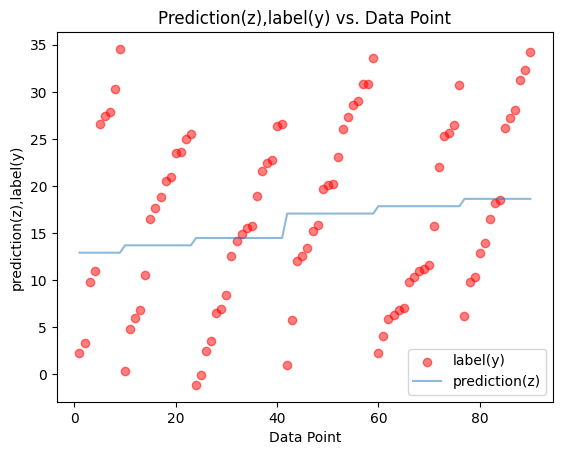

In [32]:
# create_plot(X_train,y_train)
# model = load_or_initialize_model(X_train,y_train)
model = modeltrain(X_train, y_train, l2_lambda=0.01)  # You can adjust the regularization st

pred=modeltest(X_test,y_test,model)
create_plot(X_test,y_test,pred)